In [190]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [191]:
# Save the filtered dataset to a CSV file
football_data = pd.read_csv('football_data.csv')

In [192]:
football_data['date'] = pd.to_datetime(football_data['date'], format='%d/%m/%Y')

In [193]:
df_goalkeepers = football_data[football_data['pos'] == 'GK']

In [194]:
df_goalkeepers.dtypes

competition                       object
date                      datetime64[ns]
match                             object
team                              object
pos                               object
pos_role                          object
player                            object
rater                             object
is_human                           int64
original_rating                  float64
goals                              int64
assists                            int64
shots_ontarget                     int64
shots_offtarget                    int64
shotsblocked                       int64
chances2score                      int64
drib_success                       int64
drib_unsuccess                     int64
keypasses                          int64
touches                            int64
passes_acc                         int64
passes_inacc                       int64
crosses_acc                        int64
crosses_inacc                      int64
lballs_acc      

In [195]:
# lets move towards splitting the data.

# get the locations
df_goalkeepers_y = df_goalkeepers['original_rating']
df_goalkeepers_X = df_goalkeepers.drop(columns=['original_rating'], axis=1)

In [196]:
#splitting the X to train,val and test
import pandas as pd
from sklearn.model_selection import train_test_split
player_train_val, player_test, rating_train_val, rating_test = train_test_split(df_goalkeepers_X, df_goalkeepers_y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
player_train, player_val, rating_train, rating_val = train_test_split(player_train_val, rating_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(player_train)}")
print(f"Validation set size: {len(player_val)}")
print(f"Test set size: {len(player_test)}")

Training set size: 942
Validation set size: 314
Test set size: 315


In [197]:
#calling out the one for test
player_test.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
16262,Premier League 2017-18,2018-03-31,"West Bromwich Albion - Burnley, 1 - 2",West Bromwich Albion,GK,GK,Ben Foster,WhoScored,0,0,0,0,0,0,0,0,0,0,28,16,6,0,0,11,5,0,0,0,0,6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0.857143,0.075394,0.603571,0.190476,0.0,0.0,0,1,1,90,90
8552,Premier League 2017-18,2017-12-02,"Watford - Tottenham, 1 - 1",Watford,GK,GK,Heurelho Gomes,WhoScored,0,0,0,0,0,0,0,0,0,0,29,16,1,0,0,13,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.928571,0.108327,0.574830,0.160000,0.0,0.0,0,0,1,90,90
12802,Premier League 2017-18,2018-01-31,"Stoke - Watford, 0 - 0",Watford,GK,GK,Orestis Karnezis,WhoScored,0,0,0,0,0,0,0,0,0,0,26,14,4,0,0,14,4,0,0,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0.400000,0.057735,0.421505,0.131148,0.0,0.0,0,0,0,90,90
17777,Bundesliga 2017-18,2018-04-22,"Augsburg - Mainz 05, 2 - 0",Augsburg,GK,GK,Marwin Hitz,WhoScored,0,0,0,0,0,0,0,0,0,0,37,23,8,0,0,15,7,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0.600000,0.034776,0.544444,0.223684,0.0,0.0,1,0,1,90,90
3522,Bundesliga 2017-18,2017-09-17,"Bayer Leverkusen - Freiburg, 4 - 0",Bayer Leverkusen,GK,GK,Bernd Leno,WhoScored,0,0,0,0,0,0,0,0,0,0,31,23,3,0,0,8,1,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214286,0.133688,0.670635,0.253333,0.0,0.0,1,0,1,90,90


In [198]:
player_test_clustering=player_test.copy()

In [199]:
player_train_val_clustering=player_train_val.copy()

In [142]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
16262,Premier League 2017-18,2018-03-31,"West Bromwich Albion - Burnley, 1 - 2",West Bromwich Albion,GK,GK,Ben Foster,WhoScored,0,0,0,0,0,0,0,0,0,0,28,16,6,0,0,11,5,0,0,0,0,6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0.857143,0.075394,0.603571,0.190476,0.0,0.0,0,1,1,90,90
8552,Premier League 2017-18,2017-12-02,"Watford - Tottenham, 1 - 1",Watford,GK,GK,Heurelho Gomes,WhoScored,0,0,0,0,0,0,0,0,0,0,29,16,1,0,0,13,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.928571,0.108327,0.574830,0.160000,0.0,0.0,0,0,1,90,90
12802,Premier League 2017-18,2018-01-31,"Stoke - Watford, 0 - 0",Watford,GK,GK,Orestis Karnezis,WhoScored,0,0,0,0,0,0,0,0,0,0,26,14,4,0,0,14,4,0,0,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0.400000,0.057735,0.421505,0.131148,0.0,0.0,0,0,0,90,90
17777,Bundesliga 2017-18,2018-04-22,"Augsburg - Mainz 05, 2 - 0",Augsburg,GK,GK,Marwin Hitz,WhoScored,0,0,0,0,0,0,0,0,0,0,37,23,8,0,0,15,7,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0.600000,0.034776,0.544444,0.223684,0.0,0.0,1,0,1,90,90
3522,Bundesliga 2017-18,2017-09-17,"Bayer Leverkusen - Freiburg, 4 - 0",Bayer Leverkusen,GK,GK,Bernd Leno,WhoScored,0,0,0,0,0,0,0,0,0,0,31,23,3,0,0,8,1,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214286,0.133688,0.670635,0.253333,0.0,0.0,1,0,1,90,90


In [143]:
# Save player name and match date in a separate DataFrame
player_match_info = player_test[['player', 'date','competition']].copy()

In [13]:
player_match_info

,player,date,competition
16262,Ben Foster,2018-03-31,Premier League 2017-18
8552,Heurelho Gomes,2017-12-02,Premier League 2017-18
12802,Orestis Karnezis,2018-01-31,Premier League 2017-18
17777,Marwin Hitz,2018-04-22,Bundesliga 2017-18
3522,Bernd Leno,2017-09-17,Bundesliga 2017-18
15827,Jack Butland,2018-03-17,Premier League 2017-18
443,Manuel Neuer,2016-06-16,Euro 2016
4671,Joe Hart,2017-09-30,Premier League 2017-18
20933,David Ospina,2018-06-28,World Cup 2018
8039,Kasper Schmeichel,2017-11-28,Premier League 2017-18


## Preprocesing the test set

In [14]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','pos_role','competition','player','goals',
'shots_ontarget','rcards','offsides','missed_penalties','flow_success','minutesPlayed','chances2score', 'lballs_inacc', 'passes_acc', 'poss_lost', 'ycards']

# Remove specified columns from the DataFrame
player_test= player_test.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test.head())

            date  assists  shots_offtarget  shotsblocked  drib_success  \
16262 2018-03-31        0                0             0             0   
8552  2017-12-02        0                0             0             0   
12802 2018-01-31        0                0             0             0   
17777 2018-04-22        0                0             0             0   
3522  2017-09-17        0                0             0             0   

       drib_unsuccess  keypasses  touches  passes_inacc  crosses_acc  \
16262               0          0       28             6            0   
8552                0          0       29             1            0   
12802               0          0       26             4            0   
17777               0          0       37             8            0   
3522                0          0       31             3            0   

       crosses_inacc  lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  \
16262              0          11          

In [15]:
#preprocessig
player_test['date'] = pd.to_datetime(player_test['date'], errors='coerce')

# Check for any NaT values
if player_test['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_test['year'] = player_test['date'].dt.year
player_test['month'] = player_test['date'].dt.month
player_test['day'] = player_test['date'].dt.day

# Drop the original 'date' column
player_test = player_test.drop(columns=['date'])

# Display the DataFrame
print(player_test.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
16262        0                0             0             0               0   
8552         0                0             0             0               0   
12802        0                0             0             0               0   
17777        0                0             0             0               0   
3522         0                0             0             0               0   

       keypasses  touches  passes_inacc  crosses_acc  crosses_inacc  \
16262          0       28             6            0              0   
8552           0       29             1            0              0   
12802          0       26             4            0              0   
17777          0       37             8            0              0   
3522           0       31             3            0              0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
16262          11         

In [16]:
#scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical columns using Robust Scaler
numerical_columns = player_test.select_dtypes(include=['int64', 'float64','int32']).columns
scaler = MinMaxScaler()
player_test[numerical_columns] = scaler.fit_transform(player_test[numerical_columns])

# Display the DataFrame
print(player_test.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
16262      0.0              0.0           0.0           0.0             0.0   
8552       0.0              0.0           0.0           0.0             0.0   
12802      0.0              0.0           0.0           0.0             0.0   
17777      0.0              0.0           0.0           0.0             0.0   
3522       0.0              0.0           0.0           0.0             0.0   

       keypasses   touches  passes_inacc  crosses_acc  crosses_inacc  \
16262        0.0  0.295082      0.545455          0.0            0.0   
8552         0.0  0.311475      0.090909          0.0            0.0   
12802        0.0  0.262295      0.363636          0.0            0.0   
17777        0.0  0.442623      0.727273          0.0            0.0   
3522         0.0  0.344262      0.272727          0.0            0.0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
16262    0.478261   

## processes for the train to use for feature importance

In [17]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','pos_role','competition','player','goals',
'shots_ontarget','rcards','offsides','missed_penalties','flow_success','minutesPlayed','chances2score', 'lballs_inacc', 'passes_acc', 'poss_lost', 'ycards']

# Remove specified columns from the DataFrame
player_train= player_train.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train.head())

            date  assists  shots_offtarget  shotsblocked  drib_success  \
11019 2017-12-30        0                0             0             0   
7005  2017-11-05        0                0             0             0   
9118  2017-12-09        0                0             0             0   
19559 2018-05-13        0                0             0             0   
2595  2017-08-27        0                0             0             0   

       drib_unsuccess  keypasses  touches  passes_inacc  crosses_acc  \
11019               0          0       41             7            0   
7005                0          0       25             3            0   
9118                0          0       33             5            0   
19559               0          0       20             1            0   
2595                0          0       50             8            0   

       crosses_inacc  lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  \
11019              0          10          

In [18]:
#preprocessig
player_train['date'] = pd.to_datetime(player_train['date'], errors='coerce')

# Check for any NaT values
if player_train['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train['year'] = player_train['date'].dt.year
player_train['month'] = player_train['date'].dt.month
player_train['day'] = player_train['date'].dt.day

# Drop the original 'date' column
player_train = player_train.drop(columns=['date'])

# Display the DataFrame
print(player_train.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
11019        0                0             0             0               0   
7005         0                0             0             0               0   
9118         0                0             0             0               0   
19559        0                0             0             0               0   
2595         0                0             0             0               0   

       keypasses  touches  passes_inacc  crosses_acc  crosses_inacc  \
11019          0       41             7            0              0   
7005           0       25             3            0              0   
9118           0       33             5            0              0   
19559          0       20             1            0              0   
2595           0       50             8            0              0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
11019          10         

In [19]:
#scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical columns using Robust Scaler
numerical_columns = player_train.select_dtypes(include=['int64', 'float64','int32']).columns
scaler = MinMaxScaler()
player_train[numerical_columns] = scaler.fit_transform(player_train[numerical_columns])

# Display the DataFrame
print(player_train.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
11019      0.0              0.0           0.0           0.0             0.0   
7005       0.0              0.0           0.0           0.0             0.0   
9118       0.0              0.0           0.0           0.0             0.0   
19559      0.0              0.0           0.0           0.0             0.0   
2595       0.0              0.0           0.0           0.0             0.0   

       keypasses   touches  passes_inacc  crosses_acc  crosses_inacc  \
11019        0.0  0.485714      0.411765          0.0            0.0   
7005         0.0  0.257143      0.176471          0.0            0.0   
9118         0.0  0.371429      0.294118          0.0            0.0   
19559        0.0  0.185714      0.058824          0.0            0.0   
2595         0.0  0.614286      0.470588          0.0            0.0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
11019    0.384615   

## Preprocessing the train_val set

In [20]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','pos_role','competition','player','goals',
'shots_ontarget','rcards','offsides','missed_penalties','flow_success','minutesPlayed','chances2score', 'lballs_inacc', 'passes_acc', 'poss_lost', 'ycards']

# Remove specified columns from the DataFrame
player_train_val= player_train_val.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val.head())

            date  assists  shots_offtarget  shotsblocked  drib_success  \
8893  2017-12-09        0                0             0             0   
17844 2018-04-22        0                0             0             0   
20587 2018-06-25        0                0             0             0   
5222  2017-10-14        0                0             0             0   
14795 2018-03-03        0                0             0             0   

       drib_unsuccess  keypasses  touches  passes_inacc  crosses_acc  \
8893                0          0       28             5            0   
17844               0          0       20             1            0   
20587               0          0       19             2            0   
5222                0          0       22             1            0   
14795               0          0       49             4            0   

       crosses_inacc  lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  \
8893               0          16          

In [21]:
#preprocessig
player_train_val['date'] = pd.to_datetime(player_train_val['date'], errors='coerce')

# Check for any NaT values
if player_train_val['date'].isna().any():
    print("Some dates couldn't be parsed. Handling them as NaT (Not a Time).")

# Extract year, month, and day
player_train_val['year'] = player_train_val['date'].dt.year
player_train_val['month'] = player_train_val['date'].dt.month
player_train_val['day'] = player_train_val['date'].dt.day

# Drop the original 'date' column
player_train_val = player_train_val.drop(columns=['date'])

# Display the DataFrame
print(player_train_val.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
8893         0                0             0             0               0   
17844        0                0             0             0               0   
20587        0                0             0             0               0   
5222         0                0             0             0               0   
14795        0                0             0             0               0   

       keypasses  touches  passes_inacc  crosses_acc  crosses_inacc  \
8893           0       28             5            0              0   
17844          0       20             1            0              0   
20587          0       19             2            0              0   
5222           0       22             1            0              0   
14795          0       49             4            0              0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
8893           16         

In [22]:
#scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical columns using Robust Scaler
numerical_columns = player_train_val.select_dtypes(include=['int64', 'float64','int32']).columns
scaler = MinMaxScaler()
player_train_val[numerical_columns] = scaler.fit_transform(player_train_val[numerical_columns])

# Display the DataFrame
print(player_train_val.head())

       assists  shots_offtarget  shotsblocked  drib_success  drib_unsuccess  \
8893       0.0              0.0           0.0           0.0             0.0   
17844      0.0              0.0           0.0           0.0             0.0   
20587      0.0              0.0           0.0           0.0             0.0   
5222       0.0              0.0           0.0           0.0             0.0   
14795      0.0              0.0           0.0           0.0             0.0   

       keypasses   touches  passes_inacc  crosses_acc  crosses_inacc  \
8893         0.0  0.300000      0.294118          0.0            0.0   
17844        0.0  0.185714      0.058824          0.0            0.0   
20587        0.0  0.171429      0.117647          0.0            0.0   
5222         0.0  0.214286      0.058824          0.0            0.0   
14795        0.0  0.600000      0.235294          0.0            0.0   

       lballs_acc  grduels_w  grduels_l  aerials_w  aerials_l  fouls  \
8893     0.571429   

                   Feature  Importance
27            goals_ag_itb    0.355675
28               saves_itb    0.254477
29               saves_otb    0.127512
26            goals_ag_otb    0.115198
13               aerials_w    0.037302
30               saved_pen    0.032472
10              lballs_acc    0.011667
24            dangmistakes    0.009775
34    closeness_centrality    0.009492
35         flow_centrality    0.007459
6                  touches    0.006713
12               grduels_l    0.006678
33  betweenness_centrality    0.004859
32       degree_centrality    0.003965
7             passes_inacc    0.003331
40                     day    0.002449
19           interceptions    0.002442
37           game_duration    0.001752
36       betweenness2goals    0.001323
39                   month    0.001175
25             countattack    0.001108
8              crosses_acc    0.000621
20                 tackles    0.000502
31                owngoals    0.000477
15                   foul

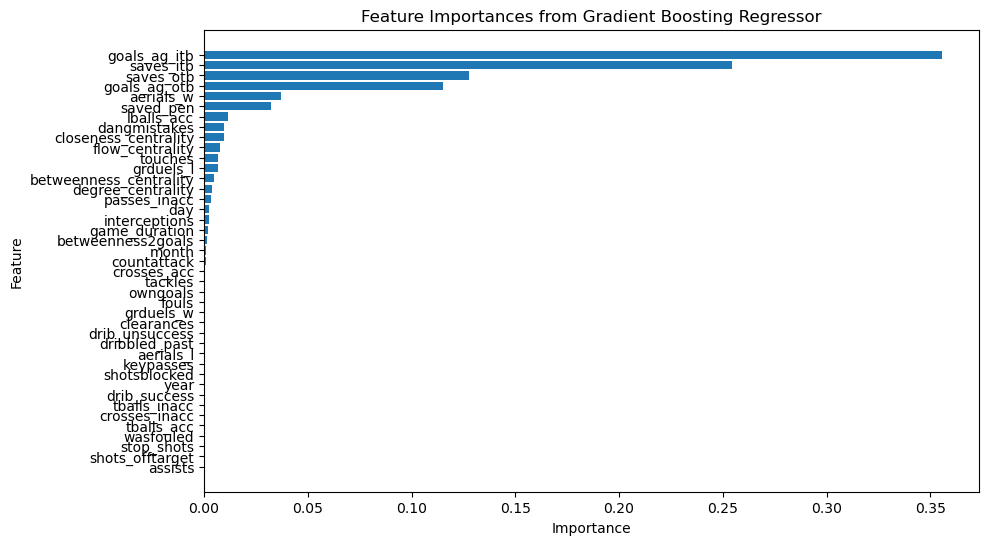

In [23]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.2
n_estimators = 50
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(player_train, rating_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = player_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [24]:
feature_importance_df

,Feature,Importance
27,goals_ag_itb,0.355675
28,saves_itb,0.254477
29,saves_otb,0.127512
26,goals_ag_otb,0.115198
13,aerials_w,0.037302
30,saved_pen,0.032472
10,lballs_acc,0.011667
24,dangmistakes,0.009775
34,closeness_centrality,0.009492
35,flow_centrality,0.007459


In [26]:
# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=50, learning_rate=0.2)
gb_regressor.fit(player_train, rating_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=player_train.columns).sort_values(ascending=False)

In [27]:
feature_importances

goals_ag_itb              0.355675
saves_itb                 0.254477
saves_otb                 0.127512
goals_ag_otb              0.115198
aerials_w                 0.037302
saved_pen                 0.032472
lballs_acc                0.011667
dangmistakes              0.009775
closeness_centrality      0.009492
flow_centrality           0.007459
touches                   0.006713
grduels_l                 0.006678
betweenness_centrality    0.004859
degree_centrality         0.003965
passes_inacc              0.003331
day                       0.002449
interceptions             0.002442
game_duration             0.001752
betweenness2goals         0.001323
month                     0.001175
countattack               0.001108
crosses_acc               0.000621
tackles                   0.000502
owngoals                  0.000477
fouls                     0.000449
grduels_w                 0.000334
clearances                0.000328
drib_unsuccess            0.000191
dribbled_past       

In [ ]:
goals_ag_itb    
               saves_itb    
               saves_otb    
            goals_ag_otb    
               aerials_w    
               saved_pen    
              lballs_acc    
            dangmistakes    
    closeness_centrality    
        flow_centrality   

In [40]:
import joblib

In [41]:
selected_features =['goals_ag_itb',    
               'saves_itb',    
               'saves_otb',    
            'goals_ag_otb',    
               'aerials_w',    
               'saved_pen',    
              'lballs_acc',    
            'dangmistakes',    
    'closeness_centrality',    
        'flow_centrality'] 
player_test_subset = player_test[selected_features]

In [42]:
player_test_subset.head()

,goals_ag_itb,saves_itb,saves_otb,goals_ag_otb,aerials_w,saved_pen,lballs_acc,dangmistakes,closeness_centrality,flow_centrality
16262,0.4,0.166667,0.125,0.0,0.0,0.0,0.478261,0.0,0.693936,0.285491
8552,0.2,0.000000,0.125,0.0,0.0,0.0,0.565217,0.0,0.594802,0.216185
12802,0.0,0.000000,0.500,0.0,0.5,0.0,0.608696,0.0,0.065963,0.150573
17777,0.0,0.166667,0.250,0.0,0.0,0.0,0.652174,0.0,0.489998,0.361009
3522,0.0,0.000000,0.000,0.0,0.0,0.0,0.347826,0.0,0.925247,0.428433


In [95]:
goalkeeper_model = joblib.load("Voting_regressor_lr_model.pkl")

In [96]:
import pandas as pd


# Make predictions on the test data
xgb_predictions = goalkeeper_model.predict(player_test_subset)

# Round the predictions to one decimal place
xgb_predictions_rounded = [round(pred, 1) for pred in xgb_predictions]

# Create a DataFrame with the rounded predictions
predictions_df = pd.DataFrame(xgb_predictions_rounded, columns=['Predicted_Ratings'])

# If you have identifiers for the players in the test set, you can add them to the DataFrame
# Assuming player_ids is a list or array containing the identifiers for player_test_subset
# player_ids = ...

# Adding identifiers to the DataFrame
# predictions_df['Player_ID'] = player_ids

print(predictions_df)

     Predicted_Ratings
0                  6.0
1                  6.1
2                  7.7
3                  7.2
4                  6.5
5                  7.3
6                  6.5
7                  6.7
8                  7.6
9                  7.1
10                 7.3
11                 7.4
12                 7.2
13                 6.1
14                 7.0
15                 8.3
16                 6.7
17                 8.1
18                 6.4
19                 6.2
20                 6.6
21                 7.0
22                 8.2
23                 7.1
24                 8.1
25                 5.6
26                 6.2
27                 8.2
28                 7.9
29                 6.7
30                 6.7
31                 6.1
32                 7.3
33                 6.9
34                 7.4
35                 6.7
36                 6.4
37                 6.9
38                 5.3
39                 5.2
40                 7.3
41                 8.4
42         

In [97]:
# Concatenate the DataFrames along the columns
# Make sure all DataFrames have the same number of rows
combined_test_df = pd.concat([player_match_info.reset_index(drop=True), 
                         predictions_df.reset_index(drop=True), 
                         rating_test.reset_index(drop=True)], axis=1)

print(combined_test_df)

                      player       date             competition  \
0                 Ben Foster 2018-03-31  Premier League 2017-18   
1             Heurelho Gomes 2017-12-02  Premier League 2017-18   
2           Orestis Karnezis 2018-01-31  Premier League 2017-18   
3                Marwin Hitz 2018-04-22      Bundesliga 2017-18   
4                 Bernd Leno 2017-09-17      Bundesliga 2017-18   
5               Jack Butland 2018-03-17  Premier League 2017-18   
6               Manuel Neuer 2016-06-16               Euro 2016   
7                   Joe Hart 2017-09-30  Premier League 2017-18   
8               David Ospina 2018-06-28          World Cup 2018   
9          Kasper Schmeichel 2017-11-28  Premier League 2017-18   
10          Andreas Isaksson 2016-06-22               Euro 2016   
11               Yann Sommer 2017-11-25      Bundesliga 2017-18   
12          Lukasz Fabianski 2016-06-21               Euro 2016   
13            Florian Muller 2018-03-09      Bundesliga 2017-1

In [98]:
combined_test_df.head()

,player,date,competition,Predicted_Ratings,original_rating
0,Ben Foster,2018-03-31,Premier League 2017-18,6.0,5.78
1,Heurelho Gomes,2017-12-02,Premier League 2017-18,6.1,6.13
2,Orestis Karnezis,2018-01-31,Premier League 2017-18,7.7,7.61
3,Marwin Hitz,2018-04-22,Bundesliga 2017-18,7.2,7.28
4,Bernd Leno,2017-09-17,Bundesliga 2017-18,6.5,6.73


In [99]:
# Calculate total predicted ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'Predicted_Ratings': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_predicted_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_predicted_rating'] = player_stats['total_predicted_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_predicted_rank'] = player_stats['weighted_avg_predicted_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_predicted_rank')

# Display the DataFrame
print(player_stats_sorted.head(20))
print(player_stats_sorted.tail(20))

                     player  total_predicted_rating  matches_played  \
25          Guillermo Ochoa                    16.1               2   
17          Eldin Jakupovic                     8.0               1   
26  Hannes Thor Halldorsson                    15.4               2   
21           Florian Muller                    15.2               2   
13             David Ospina                     7.6               1   
53            Pedro Gallese                     7.5               1   
4          Andreas Isaksson                     7.3               1   
47                 Mat Ryan                    21.9               3   
57            Ralf Fahrmann                    50.9               7   
0                    Adrian                     7.2               1   
46              Marwin Hitz                    50.1               7   
59            Robert Elliot                    14.3               2   
63        Ron-Robert Zieler                    57.1               8   
56    

In [100]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                     player  total_predicted_rating  matches_played  \
25          Guillermo Ochoa                    16.1               2   
17          Eldin Jakupovic                     8.0               1   
26  Hannes Thor Halldorsson                    15.4               2   
21           Florian Muller                    15.2               2   
13             David Ospina                     7.6               1   
53            Pedro Gallese                     7.5               1   
4          Andreas Isaksson                     7.3               1   
47                 Mat Ryan                    21.9               3   
57            Ralf Fahrmann                    50.9               7   
0                    Adrian                     7.2               1   
46              Marwin Hitz                    50.1               7   
59            Robert Elliot                    14.3               2   
63        Ron-Robert Zieler                    57.1               8   
56    

In [101]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                 player  total_predicted_rating  matches_played  \
61        Robin Zentner                    19.3               3   
54        Peter Gulacsi                    32.1               5   
6         Asmir Begovic                    44.9               7   
22        Franco Armani                     6.4               1   
49     Michael McGovern                     6.4               1   
41         Loris Karius                    25.6               4   
9            Bernd Leno                    57.2               9   
2    Alexander Schwolow                    44.3               7   
42       Lukas Hradecky                    37.4               6   
12      Darren Randolph                    18.7               3   
32             Joe Hart                    31.1               5   
48        Michael Esser                    12.4               2   
73      Willy Caballero                     6.2               1   
20     Fernando Muslera                    12.4               

In [51]:
# Calculate total original ratings and number of matches played for each player
player_stats = combined_test_df.groupby(['player']).agg({
    'original_rating': ['sum', 'count']
}).reset_index()

# Rename columns
player_stats.columns = ['player', 'total_original_rating', 'matches_played']

# Calculate weighted average predicted ratings
player_stats['weighted_avg_original_rating'] = player_stats['total_original_rating'] / player_stats['matches_played']

# Rank players based on weighted average predicted ratings
player_stats['weighted_avg_original_rank'] = player_stats['weighted_avg_original_rating'].rank(ascending=False)

# Sort by rank in ascending order
player_stats_sorted = player_stats.sort_values(by='weighted_avg_original_rank')

In [52]:
# Display the DataFrame
print(player_stats_sorted.head(20))

                     player  total_original_rating  matches_played  \
17          Eldin Jakupovic                   8.22               1   
25          Guillermo Ochoa                  16.19               2   
4          Andreas Isaksson                   7.78               1   
24             Gabor Kiraly                   7.68               1   
13             David Ospina                   7.64               1   
26  Hannes Thor Halldorsson                  14.86               2   
59            Robert Elliot                  14.72               2   
0                    Adrian                   7.29               1   
21           Florian Muller                  14.54               2   
57            Ralf Fahrmann                  50.83               7   
53            Pedro Gallese                   7.23               1   
46              Marwin Hitz                  50.54               7   
47                 Mat Ryan                  21.53               3   
60              Robi

In [53]:
# Display the DataFrame
print(player_stats_sorted.tail(20))

                 player  total_original_rating  matches_played  \
9            Bernd Leno                  57.46               9   
65        Rune Jarstein                  38.08               6   
2    Alexander Schwolow                  44.23               7   
1         Alex McCarthy                  37.70               6   
54        Peter Gulacsi                  31.33               5   
75           Yvon Mvogo                   6.25               1   
42       Lukas Hradecky                  37.48               6   
61        Robin Zentner                  18.72               3   
34      Jordan Pickford                  49.77               8   
48        Michael Esser                  12.40               2   
32             Joe Hart                  30.98               5   
12      Darren Randolph                  18.56               3   
19  Farouk Ben Mustapha                   6.14               1   
49     Michael McGovern                   6.07               1   
36       J

# using clustering method for the ranking

# using all features with average performances

In [200]:
player_train_val_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
8893,Bundesliga 2017-18,2017-12-09,"Hamburger SV - Wolfsburg, 0 - 0",Wolfsburg,GK,GK,Koen Casteels,WhoScored,0,0,0,0,0,0,0,0,0,0,28,20,5,0,0,16,5,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.928571,0.116614,0.574830,0.275362,0.0,0.0,0,0,0,90,90
17844,Premier League 2017-18,2018-04-22,"Manchester City - Swansea, 5 - 0",Manchester City,GK,GK,Ederson,WhoScored,0,0,0,0,0,0,0,0,0,0,20,17,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.866667,0.062994,0.653333,0.225806,0.0,0.0,1,0,1,90,90
20587,World Cup 2018,2018-06-25,"Iran - Portugal, 1 - 1",Portugal,GK,GK,Rui Patricio,WhoScored,0,0,0,0,0,0,0,0,0,0,19,12,2,0,0,5,2,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0.615385,0.000000,0.527473,0.229730,0.0,0.0,0,0,0,90,90
5222,Premier League 2017-18,2017-10-14,"Liverpool - Manchester United, 0 - 0",Liverpool,GK,GK,Simon Mignolet,WhoScored,0,0,0,0,0,0,0,0,0,0,22,16,1,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.600000,0.041695,0.512121,0.222222,0.0,0.0,0,0,1,90,90
14795,Premier League 2017-18,2018-03-03,"Liverpool - Newcastle United, 2 - 0",Liverpool,GK,GK,Loris Karius,WhoScored,0,0,0,0,0,0,0,0,0,0,49,35,4,0,0,7,4,0,0,1,0,5,0,0,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,1.133333,0.057093,0.622222,0.351064,0.0,0.0,1,0,1,90,90


In [201]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','pos_role','competition','goals',
'shots_ontarget','rcards','offsides','missed_penalties','flow_success','minutesPlayed',]

# Remove specified columns from the DataFrame
player_train_val_clustering= player_train_val_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_train_val_clustering.head())

            date          player  assists  shots_offtarget  shotsblocked  \
8893  2017-12-09   Koen Casteels        0                0             0   
17844 2018-04-22         Ederson        0                0             0   
20587 2018-06-25    Rui Patricio        0                0             0   
5222  2017-10-14  Simon Mignolet        0                0             0   
14795 2018-03-03    Loris Karius        0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
8893               0             0               0          0       28   
17844              0             0               0          0       20   
20587              0             0               0          0       19   
5222               0             0               0          0       22   
14795              0             0               0          0       49   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
8893           20      

In [202]:
player_train_val_clustering.head()

,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,dangmistakes,countattack,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
8893,2017-12-09,Koen Casteels,0,0,0,0,0,0,0,28,20,5,0,0,16,5,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.928571,0.116614,0.574830,0.275362,0.0,90
17844,2018-04-22,Ederson,0,0,0,0,0,0,0,20,17,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.866667,0.062994,0.653333,0.225806,0.0,90
20587,2018-06-25,Rui Patricio,0,0,0,0,0,0,0,19,12,2,0,0,5,2,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.615385,0.000000,0.527473,0.229730,0.0,90
5222,2017-10-14,Simon Mignolet,0,0,0,0,0,0,0,22,16,1,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.600000,0.041695,0.512121,0.222222,0.0,90
14795,2018-03-03,Loris Karius,0,0,0,0,0,0,0,49,35,4,0,0,7,4,0,0,1,0,5,0,0,1,0,1,0,0,0,0,0,0,2,0,0,1,1,0,0,1.133333,0.057093,0.622222,0.351064,0.0,90


In [203]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_train_val_clustering.columns.difference(['date', 'player'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals'
]

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals_ag_itb', 'goals_ag_otb', 'grduels_l',
       'grduels_w', 'interceptions', 'keypasses', 'lballs_acc', 'lballs_inacc',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'saved_pen',
       'saves_itb', 'saves_otb', 'shots_offtarget', 'shotsblocked',
       'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc', 'touches',
       'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals']


In [204]:
# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_train_val_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_train_val_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Merge aggregated performance metrics and network metrics
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_train_val_clustering.groupby('player')['date'].count().values

print("Aggregated performance and network metrics for each player:")
print(aggregated_df.head())


Aggregated performance and network metrics for each player:
               player  aerials_l  aerials_w  assists  chances2score  \
0  Abdullah Al-Mayoof          0          0        0              0   
1              Adrian          1          3        0              0   
2       Alex McCarthy          0          5        0              0   
3  Alexander Schwolow          0          9        0              1   
4  Alireza Beiranvand          0          1        0              0   

   clearances  countattack  crosses_acc  crosses_inacc  dangmistakes  \
0           0            0            0              0             0   
1           5            2            1              0             0   
2           2            3            0              0             0   
3           6            1            0              0             1   
4           0            0            0              0             0   

   drib_success  drib_unsuccess  dribbled_past  fouls  game_duration  \
0       

In [205]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,saved_pen,saves_itb,saves_otb,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,matches_played
0,Abdullah Al-Mayoof,0,0,0,0,0,0,0,0,0,0,0,0,0,90,4,1,0,0,0,0,20,3,0,25,3,3,0,1,1,0,0,0,0,0,0,40,0,0,0.571429,0.056614,0.574830,0.253012,0.000000,1
1,Adrian,1,3,0,0,5,2,1,0,0,0,0,2,2,1530,23,6,2,2,20,0,156,77,0,194,78,82,0,36,39,0,0,0,0,0,2,435,4,2,0.674639,0.089470,0.556049,0.163664,0.000000,17
2,Alex McCarthy,0,5,0,0,2,3,0,0,0,0,0,0,2,1080,13,2,0,0,11,0,85,39,0,112,39,41,0,14,20,0,0,0,0,0,0,243,1,2,0.580159,0.046241,0.522802,0.115088,0.008333,12
3,Alexander Schwolow,0,9,0,1,6,1,0,0,1,0,0,1,0,2340,37,6,0,0,26,0,325,100,1,591,104,106,0,50,35,1,0,0,0,0,2,947,0,0,0.887377,0.107253,0.567753,0.281729,0.000000,26
4,Alireza Beiranvand,0,1,0,0,0,0,0,0,0,0,0,0,0,270,1,1,0,1,0,0,19,6,0,25,6,8,1,4,4,0,0,0,0,0,0,51,1,0,0.461538,0.073058,0.462521,0.119282,0.000000,3


In [206]:
# Calculate the average performance metrics for each player
for column in performance_metric_columns:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering
average_performance_columns = [f'average_{column}' for column in performance_metric_columns]

# Combine average performance metrics with network metrics for clustering
clustering_features = average_performance_columns + network_metrics_columns

print("Aggregated DataFrame with average performance metrics and network metrics:")
print(aggregated_df[['player'] + clustering_features])

Aggregated DataFrame with average performance metrics and network metrics:
                      player  average_aerials_l  average_aerials_w  \
0         Abdullah Al-Mayoof           0.000000           0.000000   
1                     Adrian           0.058824           0.176471   
2              Alex McCarthy           0.000000           0.416667   
3         Alexander Schwolow           0.000000           0.346154   
4         Alireza Beiranvand           0.000000           0.333333   
5                    Alisson           0.000000           0.333333   
6           Andreas Isaksson           0.000000           0.500000   
7              Andreas Luthe           0.000000           0.500000   
8              Andriy Pyatov           0.000000           0.500000   
9              Asmir Begovic           0.064516           0.516129   
10                Ben Foster           0.000000           0.259259   
11                 Ben Hamer           0.000000           0.666667   
12             

In [207]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [208]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,90.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,20.000000,3.000000,0.000000,25.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,40.000000,0.000000,0.000000,0.571429,0.056614,0.574830,0.253012,0.000000
1,0.058824,0.176471,0.0,0.000000,0.294118,0.117647,0.058824,0.0,0.000000,0.0,0.0,0.117647,0.117647,90.0,1.352941,0.352941,0.117647,0.117647,1.176471,0.0,9.176471,4.529412,0.000000,11.411765,4.588235,4.823529,0.000000,2.117647,2.294118,0.000000,0.0,0.0,0.0,0.0,0.117647,25.588235,0.235294,0.117647,0.674639,0.089470,0.556049,0.163664,0.000000
2,0.000000,0.416667,0.0,0.000000,0.166667,0.250000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166667,90.0,1.083333,0.166667,0.000000,0.000000,0.916667,0.0,7.083333,3.250000,0.000000,9.333333,3.250000,3.416667,0.000000,1.166667,1.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,20.250000,0.083333,0.166667,0.580159,0.046241,0.522802,0.115088,0.008333
3,0.000000,0.346154,0.0,0.038462,0.230769,0.038462,0.000000,0.0,0.038462,0.0,0.0,0.038462,0.000000,90.0,1.423077,0.230769,0.000000,0.000000,1.000000,0.0,12.500000,3.846154,0.038462,22.730769,4.000000,4.076923,0.000000,1.923077,1.346154,0.038462,0.0,0.0,0.0,0.0,0.076923,36.423077,0.000000,0.000000,0.887377,0.107253,0.567753,0.281729,0.000000
4,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,90.0,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,6.333333,2.000000,0.000000,8.333333,2.000000,2.666667,0.333333,1.333333,1.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,17.000000,0.333333,0.000000,0.461538,0.073058,0.462521,0.119282,0.000000


In [209]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [210]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[ 2.85507482e-01 -9.43164683e-04]
 [ 1.05837982e-01  2.87052184e-01]
 [-4.13444757e-01  1.41397247e-01]
 [ 7.17687230e-01  2.03635666e-02]
 [-6.81803182e-01  2.28887914e-01]
 [-6.49643297e-01 -4.62853803e-02]
 [ 4.10962601e-01 -5.94421489e-02]
 [ 4.62473661e-01 -3.31637804e-01]
 [ 4.41879118e-01 -2.64171254e-01]
 [-2.07095230e-01  1.18373652e-01]
 [ 9.14160555e-02  2.48034533e-01]
 [-2.27521126e-02  1.21591594e-01]
 [ 2.86338198e-01 -1.27195237e-01]
 [-8.31300514e-01 -6.85808685e-01]
 [-1.44436178e-01  1.35336208e-01]
 [-8.47929865e-02 -1.65197195e-02]
 [-1.54329421e-01 -4.34230433e-02]
 [-2.76910909e-01 -3.08992912e-01]
 [-9.27783223e-02 -4.66832366e-02]
 [ 3.68525912e-01  2.45946055e-01]
 [ 5.30165577e-01 -5.32917973e-01]
 [-2.11390253e-01 -1.23067030e-01]
 [-2.32055628e-01  1.58575430e-02]
 [-1.25143585e-01 -2.72439684e-01]
 [-2.79486867e-01 -6.16490114e-01]
 [-8.15601008e-02 -5.99650584e-02]
 [-2.95052942e-01  3.41629448e-02]
 [ 4.99261171e-01 -1.044244

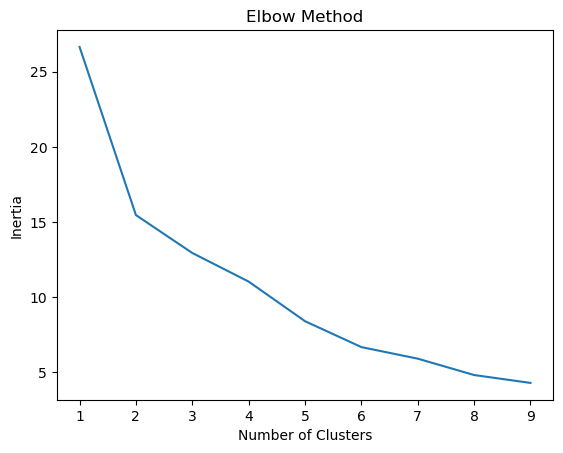

In [211]:
#uisng the elbow method to find the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting KMeans models starting from k=1 to k=10
kmeans_models = [KMeans(n_clusters=k).fit(X_pca) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

# Plotting the inertia values as a function of k
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [212]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'encoded_cluster_df' is your DataFrame containing the data

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of k values from 3 to 7
for k in range(2, 10):  # Note that the upper limit in range() is exclusive, so use 8 to include 7
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Print the silhouette score for the current k
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.3903
Silhouette Score for k=3: 0.3701
Silhouette Score for k=4: 0.2902
Silhouette Score for k=5: 0.3259
Silhouette Score for k=6: 0.3029
Silhouette Score for k=7: 0.3104
Silhouette Score for k=8: 0.3202
Silhouette Score for k=9: 0.3512


In [213]:
from sklearn.cluster import KMeans

# Assuming 'encoded_cluster_df' is your DataFrame containing the data
k_values = [2, 3, 8]
cluster_labels = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to find centroids
    labels = kmeans.predict(X_pca)  # Predicting the cluster labels based on the fitted model
    cluster_labels[k] = labels

# Print labels for one of the k values
print("Labels for k=2:", cluster_labels[2])

Labels for k=2: [0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1]


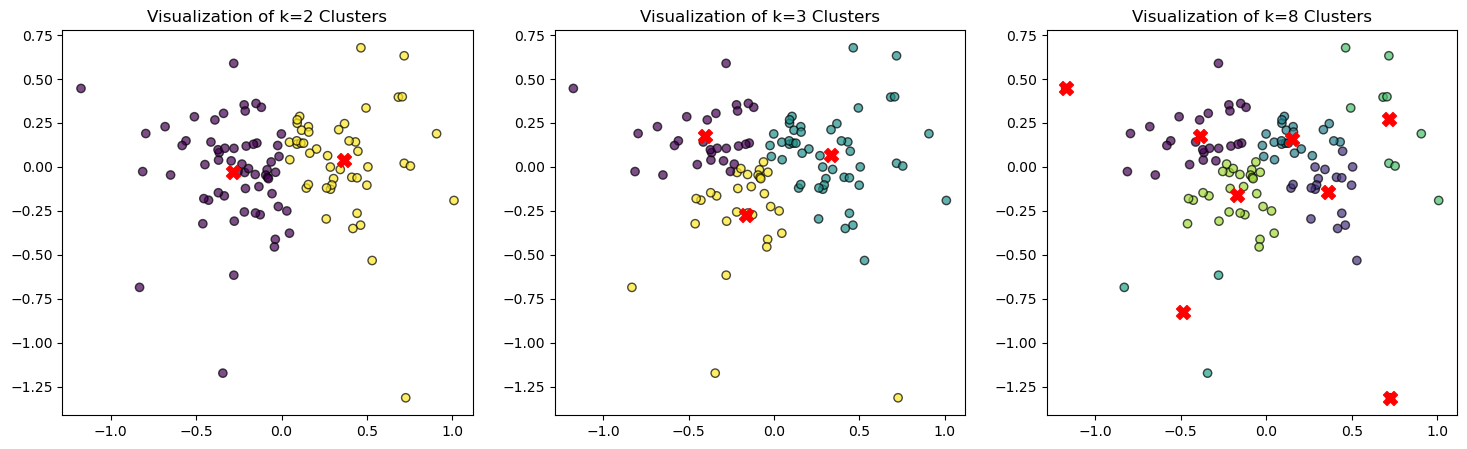

In [214]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X_pca' is your precomputed PCA data ready for clustering and visualization

# Selected k values to visualize
k_values = [2,3,8]

# Set up the plot
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 5))  # Create a subplot for each selected k

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)  # Fitting the model to the PCA reduced data
    labels = kmeans.predict(X_pca)  # Predicting cluster labels on the same data

    # Scatter plot of the reduced data with color by cluster label
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', alpha=0.7)
    axes[i].set_title(f'Visualization of k={k} Clusters')
    # Optionally, plot centroids
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='X')  # Plot centroids

plt.show()

In [215]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

In [216]:
# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = labels

In [217]:
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,saved_pen,saves_itb,saves_otb,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster
0,Abdullah Al-Mayoof,0,0,0,0,0,0,0,0,0,0,0,0,0,90,4,1,0,0,0,0,20,3,0,25,3,3,0,1,1,0,0,0,0,0,0,40,0,0,0.571429,0.056614,0.574830,0.253012,0.000000,1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,90.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,20.000000,3.000000,0.000000,25.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,40.000000,0.000000,0.000000,1
1,Adrian,1,3,0,0,5,2,1,0,0,0,0,2,2,1530,23,6,2,2,20,0,156,77,0,194,78,82,0,36,39,0,0,0,0,0,2,435,4,2,0.674639,0.089470,0.556049,0.163664,0.000000,17,0.058824,0.176471,0.0,0.000000,0.294118,0.117647,0.058824,0.0,0.000000,0.0,0.0,0.117647,0.117647,90.0,1.352941,0.352941,0.117647,0.117647,1.176471,0.0,9.176471,4.529412,0.000000,11.411765,4.588235,4.823529,0.000000,2.117647,2.294118,0.000000,0.0,0.0,0.0,0.0,0.117647,25.588235,0.235294,0.117647,1
2,Alex McCarthy,0,5,0,0,2,3,0,0,0,0,0,0,2,1080,13,2,0,0,11,0,85,39,0,112,39,41,0,14,20,0,0,0,0,0,0,243,1,2,0.580159,0.046241,0.522802,0.115088,0.008333,12,0.000000,0.416667,0.0,0.000000,0.166667,0.250000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.166667,90.0,1.083333,0.166667,0.000000,0.000000,0.916667,0.0,7.083333,3.250000,0.000000,9.333333,3.250000,3.416667,0.000000,1.166667,1.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,20.250000,0.083333,0.166667,0
3,Alexander Schwolow,0,9,0,1,6,1,0,0,1,0,0,1,0,2340,37,6,0,0,26,0,325,100,1,591,104,106,0,50,35,1,0,0,0,0,2,947,0,0,0.887377,0.107253,0.567753,0.281729,0.000000,26,0.000000,0.346154,0.0,0.038462,0.230769,0.038462,0.000000,0.0,0.038462,0.0,0.0,0.038462,0.000000,90.0,1.423077,0.230769,0.000000,0.000000,1.000000,0.0,12.500000,3.846154,0.038462,22.730769,4.000000,4.076923,0.000000,1.923077,1.346154,0.038462,0.0,0.0,0.0,0.0,0.076923,36.423077,0.000000,0.000000,1
4,Alireza Beiranvand,0,1,0,0,0,0,0,0,0,0,0,0,0,270,1,1,0,1,0,0,19,6,0,25,6,8,1,4,4,0,0,0,0,0,0,51,1,0,0.461538,0.073058,0.462521,0.119282,0.000000,3,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,90.0,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,6.333333,2.000000,0.000000,8.333333,2.000000,2.666667,0.333333,1.333333,1.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,17.000000,0.333333,0.000000,0


In [218]:
# Calculate the average performance metrics for each cluster
cluster_performance = aggregated_df.groupby('cluster')[clustering_features].mean()

In [219]:
cluster_performance

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.035590,0.476656,0.00000,0.000000,0.297938,0.258080,0.00000,0.000000,0.011699,0.001667,0.000595,0.047007,0.075726,90.677381,1.052819,0.148599,0.072226,0.081592,0.697642,0.001774,6.437710,2.422310,0.000000,12.445184,2.506731,2.873168,0.029744,1.461489,1.353475,0.000000,0.000000,0.009288,0.015467,0.001080,0.052224,23.688861,0.240594,0.061665,0.694970,0.065583,0.532838,0.189836,0.000439
1,0.036959,0.405082,0.00204,0.004403,0.343249,0.217903,0.00796,0.006068,0.034288,0.008767,0.000887,0.086117,0.033439,90.075536,1.583338,0.182010,0.083176,0.077071,1.013606,0.004925,10.107045,4.165223,0.004629,18.088321,4.351365,4.681686,0.042539,1.767609,1.564587,0.003516,0.000887,0.005319,0.009178,0.017437,0.053336,32.933363,0.147110,0.021158,0.860857,0.102808,0.578362,0.241298,0.002350


<Figure size 1400x1000 with 0 Axes>

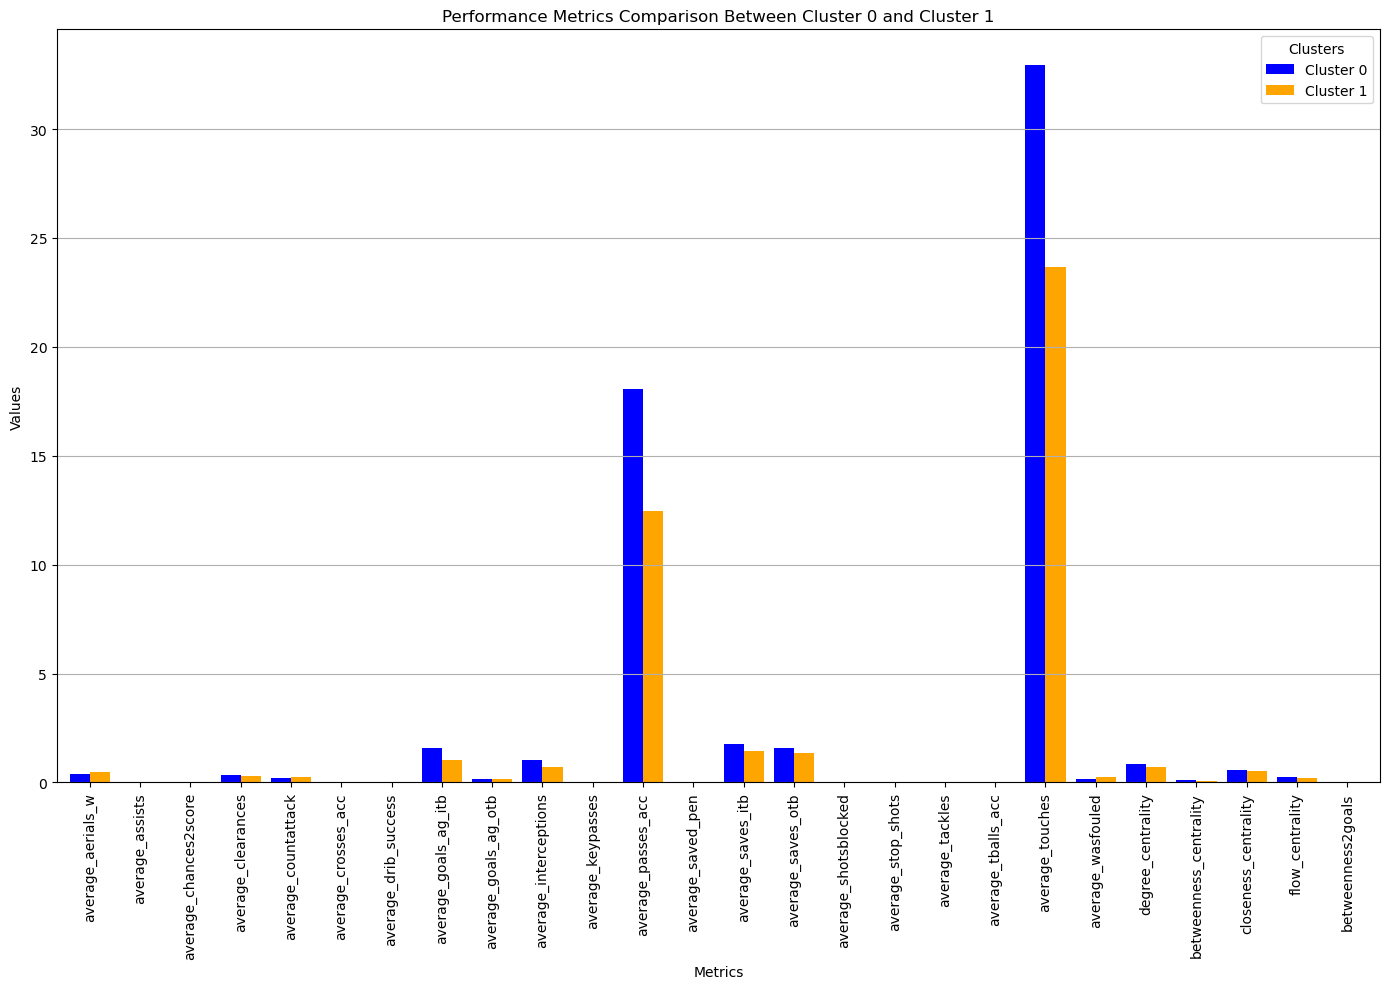

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'cluster_performance' is your DataFrame
# Define the performance metrics
metrics = [
    'average_aerials_w', 'average_assists', 'average_chances2score', 'average_clearances', 'average_countattack', 
    'average_crosses_acc', 'average_drib_success', 'average_goals_ag_itb', 'average_goals_ag_otb', 'average_interceptions', 
    'average_keypasses', 'average_passes_acc', 'average_saved_pen', 'average_saves_itb', 'average_saves_otb', 
    'average_shotsblocked', 'average_stop_shots', 'average_tackles', 'average_tballs_acc', 'average_touches', 
    'average_wasfouled', 'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 
    'betweenness2goals'
]

# Filter DataFrame to include only relevant metrics
df = cluster_performance[metrics]

# Transpose the DataFrame for better plotting
df_transposed = df.T
df_transposed.columns = ['Cluster 0', 'Cluster 1']

# Plotting
plt.figure(figsize=(14, 10))
ax = df_transposed.plot(kind='bar', figsize=(14, 10), width=0.8, color=['blue', 'orange'])
plt.title('Performance Metrics Comparison Between Cluster 0 and Cluster 1')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.legend(title='Clusters')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Analysis of Goalkeeper Clusters Based on Performance Metrics
Introduction
This report presents an analysis of two distinct clusters of goalkeepers based on their average performance metrics. The aim is to identify and compare the key attributes that differentiate these clusters, providing insights into their playing styles and effectiveness.

Cluster Overview
Cluster 0
Goalkeepers in Cluster 0 display characteristics of traditional shot-stoppers who prioritize basic defensive duties with a strong emphasis on aerial duels and shot-stopping. Key observations include:

Aerial Duels: Goalkeepers in this cluster engage in fewer aerial duels but have a higher success rate, indicating effective aerial presence.
Defensive Contributions: These goalkeepers make fewer clearances, suggesting reliance on defenders to manage the ball in dangerous areas.
Mistake Management: A low incidence of dangerous mistakes (average of 0.011699) reflects composure and sound decision-making under pressure.
Game Duration: They typically play full matches (average of 90.677381 minutes), highlighting their role as first-choice goalkeepers.
Shot-Stopping: They concede slightly over one goal per game inside the box but are effective in saving shots both inside (average of 2.873168) and outside (average of 2.506731) the box.
Passing Accuracy: Cluster 0 goalkeepers favor shorter, more accurate passes (average passes accurate: 12.445184), indicating a focus on maintaining possession.
Discipline: The relatively low yellow card rate (average of 0.240594) shows disciplined play with minimal fouls.
Cluster 1
Goalkeepers in Cluster 1 are more involved in their team's overall play, including passing and build-up, but may face higher risks and pressures, leading to a different set of challenges:

Aerial Duels: These goalkeepers engage in slightly more aerial duels but with a lower success rate, which may reflect a different defensive approach or more frequent involvement in contested situations.
Defensive Contributions: They make more clearances (average of 0.343249), indicating a more proactive role in clearing danger from the box.
Mistake Management: The frequency of dangerous mistakes is higher (average of 0.034288), suggesting that these goalkeepers might be more prone to errors under pressure.
Game Duration: Similar to Cluster 0, these goalkeepers also play full matches (average of 90.075536 minutes), underscoring their importance to the team.
Shot-Stopping: Despite making more saves (average of 4.681686 inside the box and 4.351365 outside), they concede more goals, particularly inside the box, which could point to defensive weaknesses or the high quality of opposition attacks.
Passing and Distribution: Cluster 1 goalkeepers are more involved in passing (average passes accurate: 18.088321) but at the cost of slightly lower accuracy and higher possession loss, suggesting a more ambitious but risky style of play.
Discipline: A lower yellow card rate (average of 0.147110) indicates better discipline compared to Cluster 0.
Comparison and Interpretation
Aerial Duels & Clearances: Cluster 0 is more effective in aerial duels, while Cluster 1 is more proactive in clearances but less successful in aerial contests.
Mistakes & Discipline: Cluster 1 goalkeepers are more error-prone but maintain better discipline regarding yellow cards.
Passing & Distribution: Cluster 1 goalkeepers are more central to their team’s build-up play, although this comes with a higher risk of possession loss.
Saves & Goals Conceded: Despite making more saves, Cluster 1 goalkeepers concede more goals, indicating possible vulnerabilities in their defense or greater challenges faced during matches.
Conclusion
The analysis reveals that Cluster 0 goalkeepers are more traditional in their approach, focusing on shot-stopping and aerial duels, while Cluster 1 goalkeepers are more involved in their team's overall play, with a higher degree of risk-taking. Understanding these distinctions can help in tailoring training and tactics to leverage the strengths and address the weaknesses of goalkeepers in each cluster.

Cluster 0 might be considered better performers if you value:
Defensive Stability: They make fewer dangerous mistakes and have a higher success rate in aerial duels, which are critical for a goalkeeper’s primary defensive responsibilities.
Shot-Stopping: They have a good balance between the number of saves made and the number of goals conceded, indicating effectiveness in goalkeeping.
Consistency: With lower possession loss and disciplined play (fewer yellow cards), they contribute to a more stable defensive unit.
Cluster 1 might be considered better performers if you value:
Involvement in Play: These goalkeepers are more involved in their team’s overall play, contributing to passing and possibly the build-up phase, which is increasingly important in modern football.
High Workload Handling: Despite facing more shots and being more involved in clearing the ball, they still manage to make a high number of saves, showing resilience under pressure.
Conclusion:
Cluster 0 goalkeepers might be considered better performers in a traditional sense, where consistency, reliability, and low error rates are valued.
Cluster 1 goalkeepers could be seen as better performers in a modern, more dynamic playing style, where a goalkeeper’s involvement in team play and handling high-pressure situations is more critical.
Ultimately, the "better" performer depends on the specific needs and playing style of the team. If you need a stable, traditional goalkeeper, Cluster 0 might be preferable. If you prefer a more dynamic, risk-taking goalkeeper who can contribute to the team's overall play, Cluster 1 might be better suited.

In [220]:
#using the test on the clusters from the train_val
player_test_clustering.head()

,competition,date,match,team,pos,pos_role,player,rater,is_human,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,goals_ag_otb,goals_ag_itb,saves_itb,saves_otb,saved_pen,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,win,lost,is_home_team,minutesPlayed,game_duration
16262,Premier League 2017-18,2018-03-31,"West Bromwich Albion - Burnley, 1 - 2",West Bromwich Albion,GK,GK,Ben Foster,WhoScored,0,0,0,0,0,0,0,0,0,0,28,16,6,0,0,11,5,0,0,0,0,6,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0.857143,0.075394,0.603571,0.190476,0.0,0.0,0,1,1,90,90
8552,Premier League 2017-18,2017-12-02,"Watford - Tottenham, 1 - 1",Watford,GK,GK,Heurelho Gomes,WhoScored,0,0,0,0,0,0,0,0,0,0,29,16,1,0,0,13,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.928571,0.108327,0.574830,0.160000,0.0,0.0,0,0,1,90,90
12802,Premier League 2017-18,2018-01-31,"Stoke - Watford, 0 - 0",Watford,GK,GK,Orestis Karnezis,WhoScored,0,0,0,0,0,0,0,0,0,0,26,14,4,0,0,14,4,0,0,2,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0.400000,0.057735,0.421505,0.131148,0.0,0.0,0,0,0,90,90
17777,Bundesliga 2017-18,2018-04-22,"Augsburg - Mainz 05, 2 - 0",Augsburg,GK,GK,Marwin Hitz,WhoScored,0,0,0,0,0,0,0,0,0,0,37,23,8,0,0,15,7,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0.600000,0.034776,0.544444,0.223684,0.0,0.0,1,0,1,90,90
3522,Bundesliga 2017-18,2017-09-17,"Bayer Leverkusen - Freiburg, 4 - 0",Bayer Leverkusen,GK,GK,Bernd Leno,WhoScored,0,0,0,0,0,0,0,0,0,0,31,23,3,0,0,8,1,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214286,0.133688,0.670635,0.253333,0.0,0.0,1,0,1,90,90


In [221]:
#removing columns in player 
#List of columns to remove
remove_columns = ['match', 'team', 'rater', 'is_human', 'is_home_team', 'win', 'lost','pos','pos_role','competition','goals',
'shots_ontarget','rcards','offsides','missed_penalties','flow_success','minutesPlayed',]

# Remove specified columns from the DataFrame
player_test_clustering= player_test_clustering.drop(columns=remove_columns)

# Display the first few rows of the cleaned DataFrame to confirm
print(player_test_clustering.head())

            date            player  assists  shots_offtarget  shotsblocked  \
16262 2018-03-31        Ben Foster        0                0             0   
8552  2017-12-02    Heurelho Gomes        0                0             0   
12802 2018-01-31  Orestis Karnezis        0                0             0   
17777 2018-04-22       Marwin Hitz        0                0             0   
3522  2017-09-17        Bernd Leno        0                0             0   

       chances2score  drib_success  drib_unsuccess  keypasses  touches  \
16262              0             0               0          0       28   
8552               0             0               0          0       29   
12802              0             0               0          0       26   
17777              0             0               0          0       37   
3522               0             0               0          0       31   

       passes_acc  passes_inacc  crosses_acc  crosses_inacc  lballs_acc  \
16262      

In [222]:
player_test_clustering.shape

(315, 45)

In [223]:
# Select columns relevant to player performance metrics, excluding 'date' and 'player'
metric_columns = player_test_clustering.columns.difference(['date', 'player'])

# Identify network metrics columns
network_metrics_columns = [
    'degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals'
]

# Identify performance metric columns (excluding network metrics)
performance_metric_columns = metric_columns.difference(network_metrics_columns)

# Display the selected columns
print("Performance metric columns:")
print(performance_metric_columns)
print("Network metric columns:")
print(network_metrics_columns)

Performance metric columns:
Index(['aerials_l', 'aerials_w', 'assists', 'chances2score', 'clearances',
       'countattack', 'crosses_acc', 'crosses_inacc', 'dangmistakes',
       'drib_success', 'drib_unsuccess', 'dribbled_past', 'fouls',
       'game_duration', 'goals_ag_itb', 'goals_ag_otb', 'grduels_l',
       'grduels_w', 'interceptions', 'keypasses', 'lballs_acc', 'lballs_inacc',
       'owngoals', 'passes_acc', 'passes_inacc', 'poss_lost', 'saved_pen',
       'saves_itb', 'saves_otb', 'shots_offtarget', 'shotsblocked',
       'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc', 'touches',
       'wasfouled', 'ycards'],
      dtype='object')
Network metric columns:
['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality', 'betweenness2goals']


In [224]:
# Aggregate performance metrics for each player by summing up the values
aggregated_df = player_test_clustering.groupby('player')[performance_metric_columns].sum().reset_index()

# Aggregate network metrics for each player by averaging the values
network_aggregated_df = player_test_clustering.groupby('player')[network_metrics_columns].mean().reset_index()

# Merge aggregated performance metrics and network metrics
aggregated_df = pd.merge(aggregated_df, network_aggregated_df, on='player')

# Calculate the number of matches played by each player
aggregated_df['matches_played'] = player_test_clustering.groupby('player')['date'].count().values

print("Aggregated performance and network metrics for each player:")
print(aggregated_df.head())

Aggregated performance and network metrics for each player:
               player  aerials_l  aerials_w  assists  chances2score  \
0              Adrian          0          0        0              0   
1       Alex McCarthy          1          7        0              0   
2  Alexander Schwolow          0          2        0              0   
3             Alisson          0          0        0              0   
4    Andreas Isaksson          0          0        0              0   

   clearances  countattack  crosses_acc  crosses_inacc  dangmistakes  \
0           1            0            0              0             0   
1           2            0            0              0             0   
2           2            0            0              0             0   
3           0            0            0              0             0   
4           1            0            0              0             0   

   drib_success  drib_unsuccess  dribbled_past  fouls  game_duration  \
0       

In [225]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
aggregated_df.head()

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,saved_pen,saves_itb,saves_otb,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,matches_played
0,Adrian,0,0,0,0,1,0,0,0,0,0,0,0,0,90,0,0,0,0,1,0,11,6,0,14,6,6,0,1,2,0,0,0,0,0,0,27,0,0,1.000000,0.172870,0.651584,0.261538,0.0,1
1,Alex McCarthy,1,7,0,0,2,0,0,0,0,0,0,0,0,540,11,0,0,0,5,0,47,17,0,61,18,20,0,5,4,0,0,0,0,0,0,133,2,0,0.607143,0.059138,0.505825,0.143395,0.0,6
2,Alexander Schwolow,0,2,0,0,2,0,0,0,0,0,0,0,0,630,9,1,0,1,4,0,86,25,0,169,27,28,0,6,8,0,0,0,0,0,0,247,1,0,0.865306,0.107273,0.560391,0.259697,0.0,7
3,Alisson,0,0,0,0,0,0,0,0,0,0,0,0,0,180,3,0,0,0,0,0,3,0,0,10,0,0,0,1,2,0,0,0,0,0,0,22,0,0,0.464286,0.047796,0.524845,0.153032,0.0,2
4,Andreas Isaksson,0,0,0,0,1,0,0,0,0,0,0,0,0,90,0,1,0,0,0,0,9,1,0,11,1,1,0,3,4,0,0,0,0,0,0,25,0,0,0.857143,0.100398,0.574830,0.242424,0.0,1


In [226]:
# Calculate the average performance metrics for each player
for column in performance_metric_columns:
    aggregated_df[f'average_{column}'] = aggregated_df[column] / aggregated_df['matches_played']

# Select only the average metrics for clustering
average_performance_columns = [f'average_{column}' for column in performance_metric_columns]

# Combine average performance metrics with network metrics for clustering
clustering_features = average_performance_columns + network_metrics_columns

print("Aggregated DataFrame with average performance metrics and network metrics:")
print(aggregated_df[['player'] + clustering_features])

Aggregated DataFrame with average performance metrics and network metrics:
                     player  average_aerials_l  average_aerials_w  \
0                    Adrian           0.000000           0.000000   
1             Alex McCarthy           0.166667           1.166667   
2        Alexander Schwolow           0.000000           0.285714   
3                   Alisson           0.000000           0.000000   
4          Andreas Isaksson           0.000000           0.000000   
5             Andriy Pyatov           0.000000           0.000000   
6             Asmir Begovic           0.000000           0.428571   
7          Aymen Mathlouthi           0.000000           1.000000   
8                Ben Foster           0.000000           0.200000   
9                Bernd Leno           0.000000           0.333333   
10       Christian Mathenia           0.000000           0.400000   
11       Ciprian Tatarusanu           0.000000           0.000000   
12          Darren Randolph 

In [227]:
# Select features for clustering
features = aggregated_df[clustering_features]

In [228]:
features.head()

,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals
0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,11.000000,6.000000,0.0,14.000000,6.000000,6.000000,0.0,1.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,27.000000,0.000000,0.0,1.000000,0.172870,0.651584,0.261538,0.0
1,0.166667,1.166667,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.833333,0.000000,0.0,0.000000,0.833333,0.0,7.833333,2.833333,0.0,10.166667,3.000000,3.333333,0.0,0.833333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,22.166667,0.333333,0.0,0.607143,0.059138,0.505825,0.143395,0.0
2,0.000000,0.285714,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.285714,0.142857,0.0,0.142857,0.571429,0.0,12.285714,3.571429,0.0,24.142857,3.857143,4.000000,0.0,0.857143,1.142857,0.0,0.0,0.0,0.0,0.0,0.0,35.285714,0.142857,0.0,0.865306,0.107273,0.560391,0.259697,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.500000,0.000000,0.0,0.000000,0.000000,0.0,1.500000,0.000000,0.0,5.000000,0.000000,0.000000,0.0,0.500000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,0.000000,0.0,0.464286,0.047796,0.524845,0.153032,0.0
4,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.000000,1.000000,0.0,0.000000,0.000000,0.0,9.000000,1.000000,0.0,11.000000,1.000000,1.000000,0.0,3.000000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,0.000000,0.0,0.857143,0.100398,0.574830,0.242424,0.0


In [229]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [230]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components as needed
X_pca = pca.fit_transform(features_scaled)

print("\nPCA-transformed DataFrame:")
print(X_pca)


PCA-transformed DataFrame:
[[ 0.50284618  0.17166443]
 [-0.50011706  0.34225228]
 [ 0.29112406 -0.22668173]
 [-1.42179968 -0.1029517 ]
 [-0.460069   -0.52598361]
 [ 0.3086325  -0.63247386]
 [-0.23677805 -0.20470359]
 [ 0.04898506 -0.66223844]
 [ 0.04191795  0.31243273]
 [ 0.39159145 -0.64827993]
 [-0.31026405  0.32131439]
 [ 0.0432046   0.28157955]
 [ 0.00817098  0.28723194]
 [ 0.19759622 -0.46969905]
 [-0.18466893  0.26631058]
 [-0.34923913 -0.37653404]
 [-0.43433372 -0.19048454]
 [ 0.00147634  0.67934346]
 [-0.6026915  -0.0978081 ]
 [-0.15905122 -0.50571764]
 [-0.6910198  -0.05007745]
 [ 0.15639472  0.17586975]
 [ 0.25998201  0.47411965]
 [-1.34992812  0.42977482]
 [ 0.42363175 -0.20977205]
 [-0.25354161 -0.05410441]
 [ 0.96238363  0.02036512]
 [ 0.33945605  0.30960205]
 [-0.43676767 -0.2492445 ]
 [-0.24086165 -0.27954742]
 [ 0.45135975  0.48196624]
 [-0.07814425 -0.31998899]
 [ 0.00465461  0.30425348]
 [ 0.47155873  0.03867856]
 [ 0.39028868  0.26425413]
 [ 0.73872885  0.01819796]


In [231]:
kmeans

KMeans(n_clusters=2)

In [232]:
import numpy as np

# Fit the KMeans model (if not already fitted) and get the cluster centers
cluster_labels = kmeans.predict(X_pca)
centroids = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
aggregated_df['cluster'] = cluster_labels

# Calculate the distance of each player to the cluster centroid
distances = []
for i, row in aggregated_df.iterrows():
    cluster = row['cluster']
    centroid = centroids[cluster]
    player_features = X_pca[i]
    distance = np.linalg.norm(player_features - centroid)
    distances.append(distance)

aggregated_df['distance_to_centroid'] = distances

# Sort players within each cluster based on their distance to the centroid
aggregated_df['rank_within_cluster'] = aggregated_df.groupby('cluster')['distance_to_centroid'].rank()

# Sort the players based on cluster rank and distance to centroid
sorted_players = aggregated_df.sort_values(by=['rank_within_cluster', 'player'])

# Display the sorted players
print("Sorted players by cluster performance and distance to centroid:")
print(sorted_players[['player', 'cluster', 'distance_to_centroid', 'rank_within_cluster']])

Sorted players by cluster performance and distance to centroid:
                     player  cluster  distance_to_centroid  \
25          Guillermo Ochoa        0              0.040061   
33              Jonas Lossl        1              0.108094   
47                 Mat Ryan        0              0.178906   
71               Tom Heaton        1              0.143744   
0                    Adrian        1              0.193823   
6             Asmir Begovic        0              0.182171   
41             Loris Karius        0              0.209655   
66           Simon Mignolet        1              0.203987   
16           Eiji Kawashima        0              0.220169   
46              Marwin Hitz        1              0.207219   
34          Jordan Pickford        1              0.228865   
57            Ralf Fahrmann        0              0.248206   
29            Igor Akinfeev        0              0.254402   
70                Timo Horn        1              0.231728   
21    

In [233]:
cluster_1_players = sorted_players[sorted_players['cluster'] == 1]
cluster_0_players = sorted_players[sorted_players['cluster'] == 0]

In [234]:
cluster_1_players.head(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,saved_pen,saves_itb,saves_otb,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
33,Jonas Lossl,2,2,0,0,4,3,0,0,2,0,0,0,0,990,17,1,1,1,8,0,108,55,0,211,56,60,0,20,10,0,0,0,1,0,0,365,1,0,0.929504,0.119881,0.583440,0.254381,0.000000,11,0.181818,0.181818,0.0,0.0,0.363636,0.272727,0.000000,0.0,0.181818,0.0,0.000,0.000,0.000000,90.00,1.545455,0.090909,0.090909,0.090909,0.727273,0.0,9.818182,5.000000,0.0,19.181818,5.090909,5.454545,0.000000,1.818182,0.909091,0.0,0.0,0.0,0.090909,0.0,0.000000,33.181818,0.090909,0.000000,1,0.108094,1.0
71,Tom Heaton,0,2,0,0,0,0,0,0,0,0,0,0,0,90,2,0,0,0,0,0,15,5,0,18,5,5,0,0,4,0,0,0,0,0,0,34,0,0,0.928571,0.162963,0.548701,0.241379,0.000000,1,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0.000,0.000000,90.00,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000,5.000000,0.0,18.000000,5.000000,5.000000,0.000000,0.000000,4.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,34.000000,0.000000,0.000000,1,0.143744,2.0
0,Adrian,0,0,0,0,1,0,0,0,0,0,0,0,0,90,0,0,0,0,1,0,11,6,0,14,6,6,0,1,2,0,0,0,0,0,0,27,0,0,1.000000,0.172870,0.651584,0.261538,0.000000,1,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000,0.000,0.000000,90.00,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,11.000000,6.000000,0.0,14.000000,6.000000,6.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,27.000000,0.000000,0.000000,1,0.193823,3.0
66,Simon Mignolet,1,3,0,0,2,3,0,0,1,0,0,0,2,450,5,1,2,0,8,0,43,22,0,83,23,25,1,7,4,0,0,0,0,0,0,157,0,2,0.905714,0.082975,0.583505,0.197108,0.000000,5,0.200000,0.600000,0.0,0.0,0.400000,0.600000,0.000000,0.0,0.200000,0.0,0.000,0.000,0.400000,90.00,1.000000,0.200000,0.400000,0.000000,1.600000,0.0,8.600000,4.400000,0.0,16.600000,4.600000,5.000000,0.200000,1.400000,0.800000,0.0,0.0,0.0,0.000000,0.0,0.000000,31.400000,0.000000,0.400000,1,0.203987,4.0
46,Marwin Hitz,0,4,0,0,4,4,0,0,0,0,0,0,1,630,4,1,0,0,7,0,86,24,0,134,26,29,0,8,21,0,0,0,0,0,1,230,0,1,0.796703,0.113111,0.572553,0.238411,0.011905,7,0.000000,0.571429,0.0,0.0,0.571429,0.571429,0.000000,0.0,0.000000,0.0,0.000,0.000,0.142857,90.00,0.571429,0.142857,0.000000,0.000000,1.000000,0.0,12.285714,3.428571,0.0,19.142857,3.714286,4.142857,0.000000,1.142857,3.000000,0.0,0.0,0.0,0.000000,0.0,0.142857,32.857143,0.000000,0.142857,1,0.207219,5.0
34,Jordan Pickford,0,5,0,0,5,0,0,0,0,0,1,0,0,750,10,3,1,2,11,0,84,42,0,129,45,47,0,9,14,0,0,0,0,0,1,259,3,0,0.727381,0.087886,0.529122,0.223676,0.000000,8,0.000000,0.625000,0.0,0.0,0.625000,0.000000,0.000000,0.0,0.000000,0.0,0.125,0.000,0.000000,93.75,1.250000,0.375000,0.125000,0.250000,1.375000,0.0,10.500000,5.250000,0.0,16.125000,5.625000,5.875000,0.000000,1.125000,1.750000,0.0,0.0,0.0,0.000000,0.0,0.125000,32.375000,0.375000,0.00

In [235]:
cluster_0_players.tail(20)

,player,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,game_duration,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,saved_pen,saves_itb,saves_otb,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,matches_played,average_aerials_l,average_aerials_w,average_assists,average_chances2score,average_clearances,average_countattack,average_crosses_acc,average_crosses_inacc,average_dangmistakes,average_drib_success,average_drib_unsuccess,average_dribbled_past,average_fouls,average_game_duration,average_goals_ag_itb,average_goals_ag_otb,average_grduels_l,average_grduels_w,average_interceptions,average_keypasses,average_lballs_acc,average_lballs_inacc,average_owngoals,average_passes_acc,average_passes_inacc,average_poss_lost,average_saved_pen,average_saves_itb,average_saves_otb,average_shots_offtarget,average_shotsblocked,average_stop_shots,average_tackles,average_tballs_acc,average_tballs_inacc,average_touches,average_wasfouled,average_ycards,cluster,distance_to_centroid,rank_within_cluster
20,Fernando Muslera,0,2,0,0,0,0,0,0,0,0,0,0,0,180,2,1,0,0,1,0,13,3,0,23,4,5,0,0,3,0,0,0,0,0,0,43,0,0,0.607143,0.059859,0.538903,0.194146,0.0,2,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,1.000000,0.500000,0.000000,0.000000,0.500000,0.0,6.500000,1.500000,0.0,11.500000,2.000000,2.500000,0.0,0.000000,1.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,21.500000,0.000000,0.0,0,0.406844,20.0
45,Martin Dubravka,0,1,0,0,2,0,0,0,0,0,0,0,0,180,1,0,0,0,2,0,19,4,0,24,4,6,0,1,1,0,0,0,0,0,0,40,0,0,0.466667,0.072800,0.473413,0.194815,0.0,2,0.000000,0.500000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,0.500000,0.000000,0.000000,0.000000,1.000000,0.0,9.500000,2.000000,0.0,12.000000,2.000000,3.000000,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,20.000000,0.000000,0.0,0,0.421861,21.0
1,Alex McCarthy,1,7,0,0,2,0,0,0,0,0,0,0,0,540,11,0,0,0,5,0,47,17,0,61,18,20,0,5,4,0,0,0,0,0,0,133,2,0,0.607143,0.059138,0.505825,0.143395,0.0,6,0.166667,1.166667,0.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,1.833333,0.000000,0.000000,0.000000,0.833333,0.0,7.833333,2.833333,0.0,10.166667,3.000000,3.333333,0.0,0.833333,0.666667,0.0,0.0,0.0,0.0,0.000000,0.000000,22.166667,0.333333,0.0,0,0.429172,22.0
12,Darren Randolph,0,0,0,0,0,0,0,0,0,0,0,0,0,270,4,0,0,1,2,0,33,13,0,37,15,15,0,2,4,0,0,0,0,0,1,75,0,0,0.763736,0.143140,0.588618,0.169360,0.0,3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,1.333333,0.000000,0.000000,0.333333,0.666667,0.0,11.000000,4.333333,0.0,12.333333,5.000000,5.000000,0.0,0.666667,1.333333,0.0,0.0,0.0,0.0,0.000000,0.333333,25.000000,0.000000,0.0,0,0.431002,23.0
32,Joe Hart,0,0,0,0,0,1,0,0,0,0,0,0,0,450,11,0,0,0,4,0,57,23,0,71,24,24,0,9,4,0,0,0,0,0,0,137,1,0,0.746081,0.087824,0.560423,0.179150,0.0,5,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,2.200000,0.000000,0.000000,0.000000,0.800000,0.0,11.400000,4.600000,0.0,14.200000,4.800000,4.800000,0.0,1.800000,0.800000,0.0,0.0,0.0,0.0,0.000000,0.000000,27.400000,0.200000,0.0,0,0.441326,24.0
67,Steve Mandanda,0,1,0,0,0,2,0,0,0,0,0,0,0,90,0,0,0,0,2,0,7,2,0,17,2,2,0,0,1,0,0,0,0,0,0,28,0,0,0.714286,0.054254,0.574830,0.301205,0.0,1,0.000000,1.000000,0.0,0.0,0.000000,2.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,90.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,7.000000,2.000000,0.0,17.000000,2.000000,2.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,28.000000,0.000000,0.0,0,0.441887,25.0
59,Robert Elliot,0,0,0,0,0,2,0,0,0,0,0,0,0,180,2,0,0,0,2,0,18,7,0,20,7,7,0,7,1,0,0,0,0,0,0,43,0,0,0.588095,0.104165,0.487783,0.142797,0.0,2,0.000000,0.000000